In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot(X,y,pred,xtest):
    plt.figure(figsize=(6,5))
    plt.scatter(X,y)
    plt.plot(xtest,pred,'*-',color='red')
    plt.grid(True)
    plt.show()

# Regressão Linear

In [5]:
class RegressaoLinear():
    def __init__(self,svd=False,pseudo=False):
        self.pseudo = pseudo
        self.svd    = svd
    def fit(self,X:np.array,y:np.array):
        X = np.c_[np.ones((np.size(X),1)),X]

        if   (self.svd):
            self.theta = np.linalg.pinv(X).dot(y)
        elif (self.pseudo):
            self.theta = np.linalg.pinv(X).dot(y)
        else:
            theta = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
            self.theta = theta

    def predict(self,X):
        X = np.c_[np.ones((np.size(X))),X]
        return X.dot(self.theta)

In [6]:
X = 2 * np.random.rand(100,1)
y = 4*X +np.random.randn(100,1)

In [7]:
xtest = np.array([[0],[2],[1]])
print(xtest)

[[0]
 [2]
 [1]]


In [8]:
reg  = RegressaoLinear(pseudo=True)
reg.fit(X,y)
pred = reg.predict(xtest)

In [9]:
pred,xtest

(array([[0.12682919],
        [7.91336761],
        [4.0200984 ]]),
 array([[0],
        [2],
        [1]]))

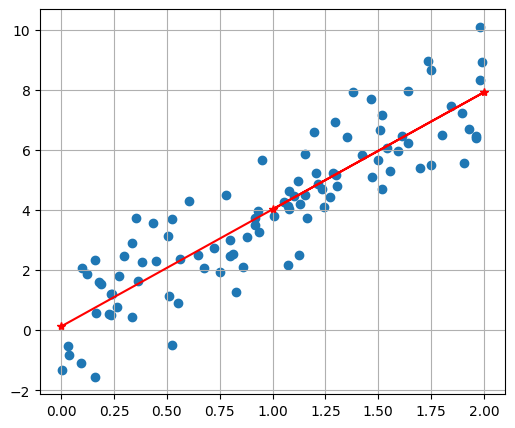

In [10]:
plot(X,y,pred,xtest)

In [11]:
from sklearn.linear_model import LinearRegression
regLi = LinearRegression()
regLi.fit(X,y)
pred = regLi.predict(xtest)

In [12]:
pred

array([[0.12682919],
       [7.91336761],
       [4.0200984 ]])

### Gradiente descendente em lote(batch)

$\nabla_{\theta} MSE(\theta) = \frac{2}{m} \cdot X^T (X\cdot\theta - y)$
> Vetor gradiente da função de custo

$\theta_{iter} = \theta - \eta \cdot \nabla MSE(\theta)$
> etapa do gradiente descendente

In [13]:
class GradientBatch:
    def __init__(self,theta = np.random.randn(2,1), eta = 0.1 , maxiter = 1_000):
        self.theta   = theta
        self.eta     = eta 
        self.maxiter = maxiter


    def condition(self,vetor):
        if ( np.any(np.isinf(vetor))   ):return True 
        if ( np.any(np.isnan(vetor))   ):return True
        if ( np.any(np.isneginf(vetor))):return True
        return False
    
    def fit(self,X:np.array,y=None):
        m =  np.size(X)
        X =  np.c_[np.ones((m,1)),X]

        for iter in range(self.maxiter):
            vetorGradiente = X.T.dot(X.dot(self.theta) - y)
            vetorGradiente = 1/m * vetorGradiente
            
            if self.condition(vetorGradiente):
                break
            
            self.theta = self.theta - self.eta * vetorGradiente

            if self.condition(self.theta):
                break
        return self.theta
    
    def predict(self,X):
        X = np.c_[np.ones(np.size(X)),X]
        return X.dot(self.theta)

In [14]:
X = 2 * np.random.rand(100,1)
y = 4*X +np.random.randn(100,1)

In [15]:
xtest = np.array([[0],[2]])

In [18]:
grad = GradientBatch(eta=0.020398367346938777,maxiter=1000)
grad.fit(X,y)
pred  = grad.predict(xtest)

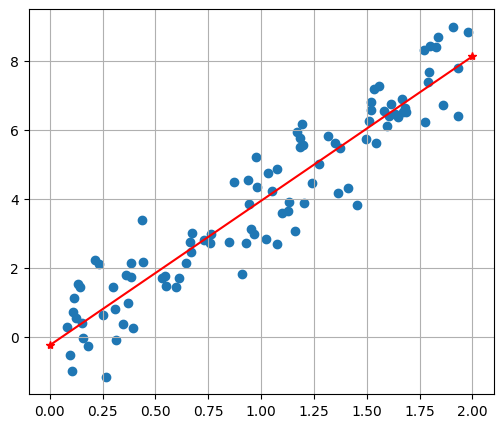

In [19]:
plot(X,y,pred,xtest)